# Testing Sentiment Analysis
-----

In this notebook we test sentiment analysis techniques for analysing natural language for which there are three experiments.

In the first experiment we compare different document scores for each text.

In the second experiment we compare scores for named entities identified in each document.

The sentiment analysis APIs we test are general purpose provided by Text Blob and state-of-the-art provided by both IBM's Watson and Google.

## Load the Sentiment Analysis Dataset

In [2]:
%%time
import os
import pickle

filepath = os.getcwd()
pickle_filename = "sentiment_analysis"
with open(os.path.join(filepath, pickle_filename), 'rb') as file:
    sentiment_analysis = pickle.load(file)

Wall time: 26.9 ms


## Test 1 - Document Sentiment Scores

In this first test we look at how each API scores each text of the dataset overall.

In this test we colate and display document sentiment scores for TextBlob, Watson and Google.

Note - Mein Kampf is too large for the Google API limits, therefore, it has been given a score of 0 for this test.

In [6]:
%%time
import pandas as pd

df = []
def get_doc_scores(dataset):
    
    for orator in dataset.values():
        for document in orator:
            line = dict()
            line["ref"] = document["ref"]
            line["datestamp"] = document["datestamp"]
            line["title"] = document["title"]
            line["word count"] = document["word count"]
            line["sentence count"] = len(document["sentences"])
            line["textblob"] = document["sentiment_scores"]["textblob"]
            line["watson"] = document["sentiment_scores"]["watson"]
            line["google"] = document["sentiment_scores"]["google"]
            
            yield line

df = pd.DataFrame(get_doc_scores(sentiment_analysis))
display(df.style.background_gradient(cmap="Blues", subset = df.columns[-3:]))


,ref,datestamp,title,word count,sentence count,textblob,watson,google
0,hitler,2020-06-30,Mein Kampf,706100,4527,0.096408,0.373203,-0.225447
1,bush,2001-09-11,911 Address to the Nation,3482,37,0.093816,0.469524,0.000000
2,bush,2001-09-14,Remarks at the National Day of Prayer & Remembrance Service,5116,57,0.153784,0.298916,0.000000
3,bush,2001-09-15,First Radio Address following 911,2667,30,0.196519,0.351540,0.000000
4,bush,2001-09-17,"Address at Islamic Center of Washington, D.C.",2695,39,-0.076026,0.333191,0.000000
5,bush,2001-09-20,Address to Joint Session of Congress Following 911 Attacks,17321,186,0.132154,-0.331922,-0.100000
6,bush,2001-10-07,Operation Enduring Freedom in Afghanistan Address to the Nation,5693,57,0.167453,0.386644,0.000000
7,bush,2001-10-11,911 Pentagon Remembrance Address,6673,93,0.061266,-0.331954,-0.100000
8,bush,2001-10-11,Prime Time News Conference on War on Terror,4262,37,0.147233,0.333918,0.000000
9,bush,2001-10-11,Prime Time News Conference Q&A,32002,410,0.118774,0.297858,-0.100000


Wall time: 122 ms


#### Discussion

There is no conclusive result from this test to determine the performance of each API. The results are too varied and there is no benchmark to assess the meaning of each score.

<< more discussion to be added here >>

## Test 2 - Testing Sentiment Scores at the Sentence Level

In this next experiment we show the sentiment scores for each sentence of selected documents.

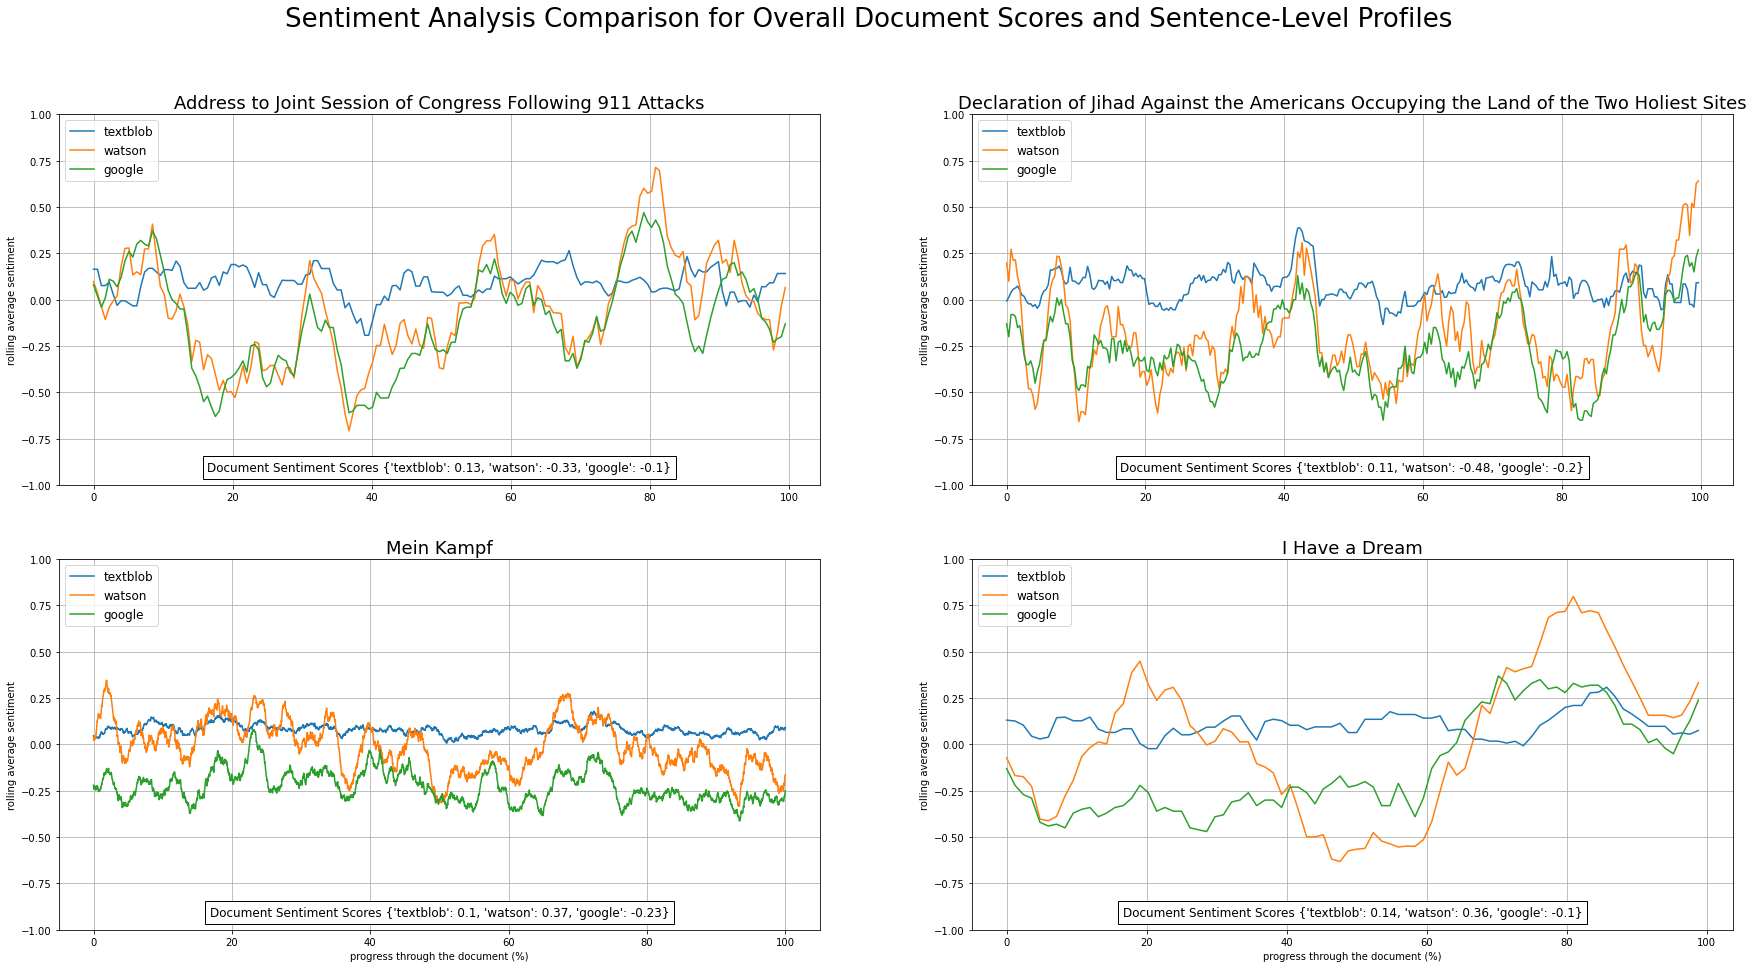

In [31]:
import importlib
import cndplots
importlib.reload(cndplots)

# setup document references
# orator ref // document reference // smoothing window
orators_list = [("bush", 4, 10), ("laden", 0, 10), ("hitler", 0, 100), ("king", 1, 10)]

fig = cndplots.sentiment_plot(orators_list, sentiment_analysis, smooth = True, \
                    figtitle = 'Sentiment Analysis Comparison for Overall Document Scores and Sentence-Level Profiles',
                    xlabel = 'progress through the document (%)',
                    ylabel = 'rolling average sentiment')
fig.savefig(fname = "sentiment_plots")